In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = {'x':[1,2,3,4,5,6],'y':[5,11,14,8,17,5]}
data = pd.DataFrame(data)
data

,x,y
0,1,5
1,2,11
2,3,14
3,4,8
4,5,17
5,6,5


In [6]:
data['y - ybar']  = data['y'] - data['y'].mean()
data['x - xbar']  = data['x'] - data['x'].mean()
data['(x-xbar)(y-ybar)'] = data['y - ybar'] * data['x - xbar']
data['(x-xbar)sqr'] = data['x - xbar'] ** 2
data['(y-ybar)sqr'] = data['y - ybar'] ** 2
data

,x,y,y - ybar,x - xbar,(x-xbar)(y-ybar),(x-xbar)sqr,(y-ybar)sqr
0,1,5,-5.0,-2.5,12.5,6.25,25.0
1,2,11,1.0,-1.5,-1.5,2.25,1.0
2,3,14,4.0,-0.5,-2.0,0.25,16.0
3,4,8,-2.0,0.5,-1.0,0.25,4.0
4,5,17,7.0,1.5,10.5,2.25,49.0
5,6,5,-5.0,2.5,-12.5,6.25,25.0


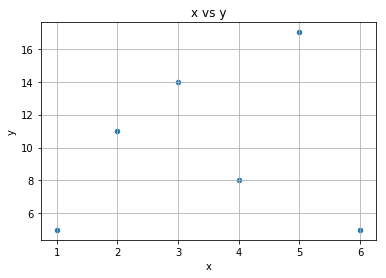

In [7]:
data.plot(x= 'x',y='y',kind='Scatter',grid=True)
plt.title('x vs y')
plt.show()

In [12]:
print('SSE @ mean (10)= ',data['(y-ybar)sqr'].sum())

SSE @ mean (10)=  120.0


In [14]:
data.corr()

,x,y,y - ybar,x - xbar,(x-xbar)(y-ybar),(x-xbar)sqr,(y-ybar)sqr
x,1.000000,0.130931,0.130931,1.000000,-0.510800,0.000000,0.404141
y,0.130931,1.000000,1.000000,0.130931,0.292597,-0.657376,0.350758
y - ybar,0.130931,1.000000,1.000000,0.130931,0.292597,-0.657376,0.350758
x - xbar,1.000000,0.130931,0.130931,1.000000,-0.510800,0.000000,0.404141
(x-xbar)(y-ybar),-0.510800,0.292597,0.292597,-0.510800,1.000000,0.015896,0.444112
(x-xbar)sqr,0.000000,-0.657376,-0.657376,0.000000,0.015896,1.000000,0.335389
(y-ybar)sqr,0.404141,0.350758,0.350758,0.404141,0.444112,0.335389,1.000000


In [16]:
b1 = data['(x-xbar)(y-ybar)'].sum() / data['(x-xbar)sqr'].sum()
print('b1 = ',b1)

b1 =  0.34285714285714286


In [17]:
b0  = data['y'].mean() - b1 * data['x'].mean()
print('b0 = ',b0)

b0 =  8.8


# $ y = b_0 + b_1 *x $ 

In [18]:
y_pred = b0+ b1*data['x']

In [21]:
data['yhat'] = y_pred
data

,x,y,y - ybar,x - xbar,(x-xbar)(y-ybar),(x-xbar)sqr,(y-ybar)sqr,yhat
0,1,5,-5.0,-2.5,12.5,6.25,25.0,9.142857
1,2,11,1.0,-1.5,-1.5,2.25,1.0,9.485714
2,3,14,4.0,-0.5,-2.0,0.25,16.0,9.828571
3,4,8,-2.0,0.5,-1.0,0.25,4.0,10.171429
4,5,17,7.0,1.5,10.5,2.25,49.0,10.514286
5,6,5,-5.0,2.5,-12.5,6.25,25.0,10.857143


In [22]:
data['(y -yhat)sqr'] = (data['y'] - data['yhat'])**2
data

,x,y,y - ybar,x - xbar,(x-xbar)(y-ybar),(x-xbar)sqr,(y-ybar)sqr,yhat,(y -yhat)sqr
0,1,5,-5.0,-2.5,12.5,6.25,25.0,9.142857,17.163265
1,2,11,1.0,-1.5,-1.5,2.25,1.0,9.485714,2.293061
2,3,14,4.0,-0.5,-2.0,0.25,16.0,9.828571,17.400816
3,4,8,-2.0,0.5,-1.0,0.25,4.0,10.171429,4.715102
4,5,17,7.0,1.5,10.5,2.25,49.0,10.514286,42.064490
5,6,5,-5.0,2.5,-12.5,6.25,25.0,10.857143,34.306122


In [23]:
print('new SSE @ yhat',data['(y -yhat)sqr'].sum())

new SSE @ yhat 117.94285714285715


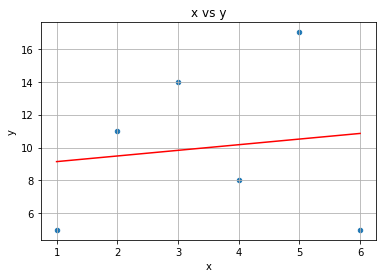

In [27]:
data.plot(x= 'x',y='y',kind='Scatter',grid=True)
#plt.plot(data['x'],,'g')
plt.plot(data['x'],data['yhat'],'r')
plt.title('x vs y')
plt.show()